In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S2/Office_Allyson-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
len(train_data),len(test_data)

(3600, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24, 1)
y_train.shape =  (3576,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
28/28 [==============================] - 5s 28ms/step - loss: 423.7378
Epoch 2/300
28/28 [==============================] - 1s 26ms/step - loss: 333.2475
Epoch 3/300
28/28 [==============================] - 1s 26ms/step - loss: 273.3923
Epoch 4/300
28/28 [==============================] - 1s 26ms/step - loss: 238.5501
Epoch 5/300
28/28 [==============================] - 1s 27ms/step - loss: 217.0137
Epoch 6/300
28/28 [==============================] - 1s 26ms/step - loss: 199.5688
Epoch 7/300
28/28 [==============================] - 1s 25ms/step - loss: 184.2051
Epoch 8/300
28/28 [==============================] - 1s 26ms/step - loss: 170.8667
Epoch 9/300
28/28 [==============================] - 1s 26ms/step - loss: 159.0218
Epoch 10/300
28/28 [==============================] - 1s 26ms/step - loss: 148.6360
Epoch 11/300
28/28 [==============================] - 1s 25ms/step - loss: 139.3841
Epoch 12/300
28/28 [==============================] - 1s 26ms/step - loss: 131.2462
E

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 2.3718165396937825
Root Mean Squared Error for Stacked LSTM Model for testing is: 2.3722720373153376
Mean Absolute Error for Stacked LSTM Model for training is: 1.227817258066779
Mean Absolute Error for Stacked LSTM Model for testing is: 1.417764225225339
MAPE for Stacked Model for training is: 0.05671913117675886
MAPE for Stacked Model for testing is: 0.08057316825903407


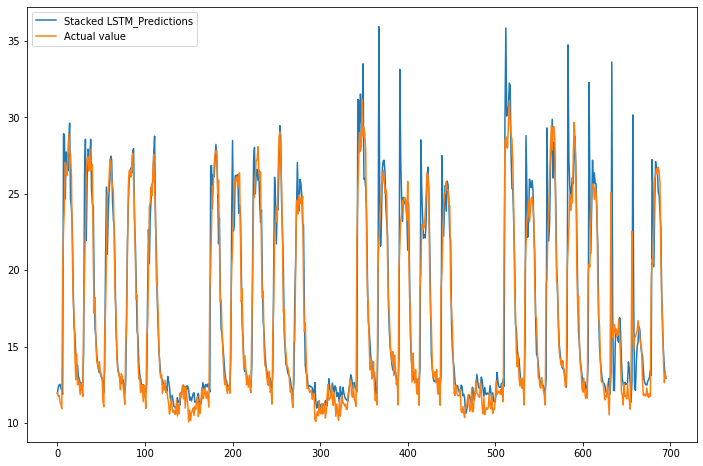

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([11.99]), array([11.93541], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.05459045]), array([-0.59466171]), array([-0.68544144]), array([-1.1555394]), array([-1.05366329]), array([-1.19193298]), array([7.9182444]), array([-6.29730522]), array([-4.6830619]), array([2.40340858]), array([-1.3829731]), array([-1.17591125]), array([1.08051903]), array([0.38918175]), array([-1.91387657]), array([2.9274691]), array([2.15612129]), array([-1.20015358]), array([-0.88724197]), array([0.80590019]), array([-1.32641937]), array([-1.63705055]), array([1.02494766]), array([-1.29364468]), array([-0.19085541]), array([-0.27803699]), array([-0.76598991]), array([0.3362606]), array([0.49555721]), array([-0.78968384]), array([2.58672508]), array([-6.43493675]), array([-5.82539154]), array([4.33885696]), array([1.18325645]), array([-0.51982841]), array([-1.20671036]), array([0.90270012]), array([-2.0448365]), array([1.57182823]), array([2.64064758]), array([-3.57685768]), array([-1.69317825]), array([2.04501244]), array([-0.43524441]), array([-0.47782825]), array([-0.08

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([11.82944237]), array([-17.24178802]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(434, 262)